In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\P SIVA KUMAR\\Downloads\\NVDA.csv")


df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [2]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000
6557,2025-02-14,138.850006,138.850006,139.250000,135.500000,136.479996,194892300


In [3]:
df.dropna(inplace=True)
df.sort_values(by='Date', inplace=True)

In [4]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536
...,...,...
6553,2025-02-10,133.570007
6554,2025-02-11,132.800003
6555,2025-02-12,131.139999
6556,2025-02-13,135.289993


In [10]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [11]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1999-01-22
1      1999-01-25
2      1999-01-26
3      1999-01-27
4      1999-01-28
          ...    
6553   2025-02-10
6554   2025-02-11
6555   2025-02-12
6556   2025-02-13
6557   2025-02-14
Name: Date, Length: 6558, dtype: datetime64[ns]

In [5]:
df['Date']

0       1999-01-22
1       1999-01-25
2       1999-01-26
3       1999-01-27
4       1999-01-28
           ...    
6553    2025-02-10
6554    2025-02-11
6555    2025-02-12
6556    2025-02-13
6557    2025-02-14
Name: Date, Length: 6558, dtype: object

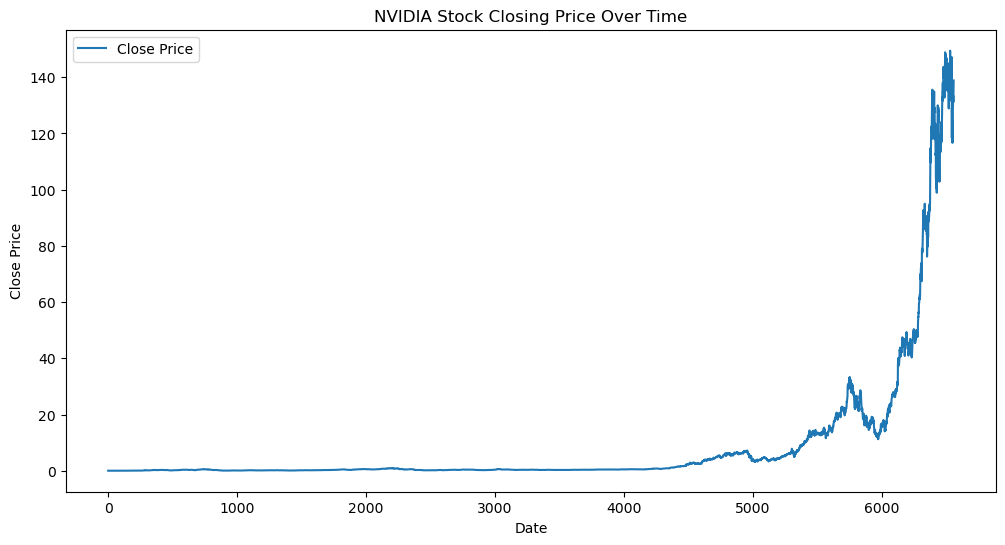

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

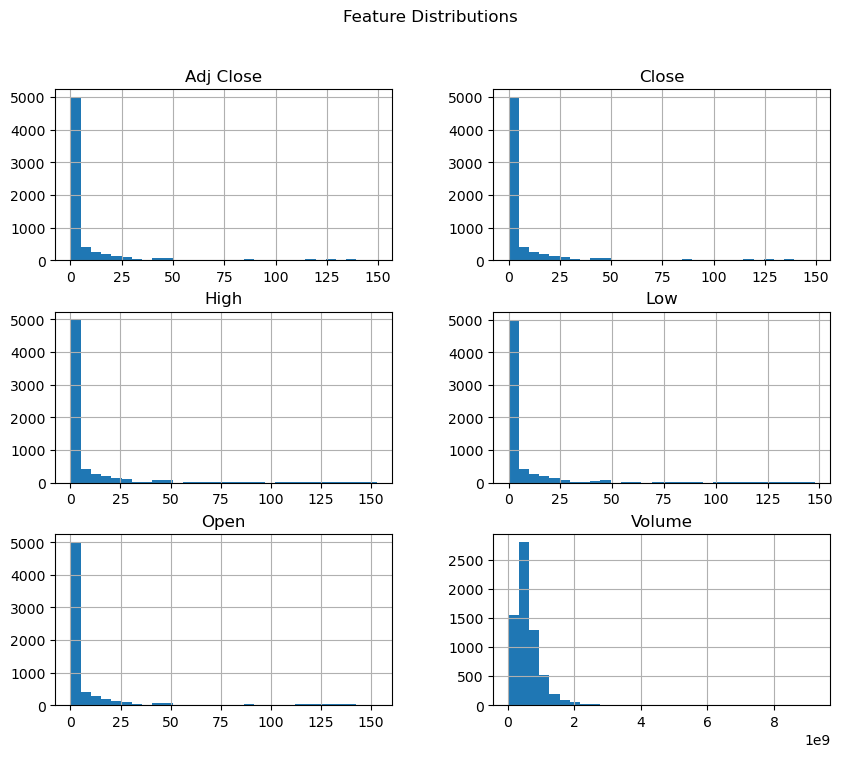

In [15]:
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

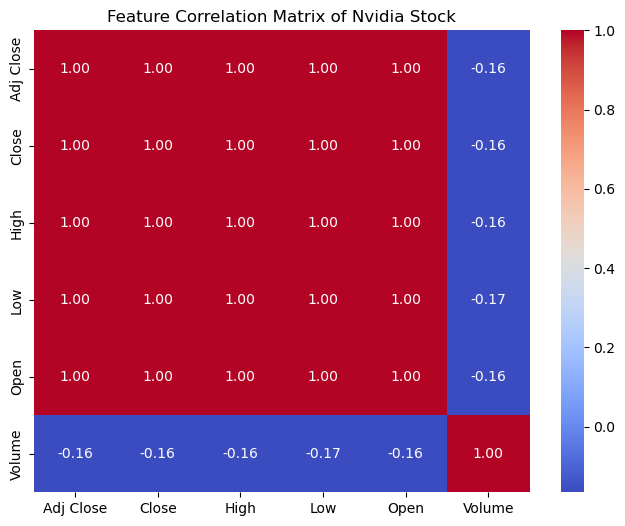

In [17]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix of Nvidia Stock')
plt.show()

In [18]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


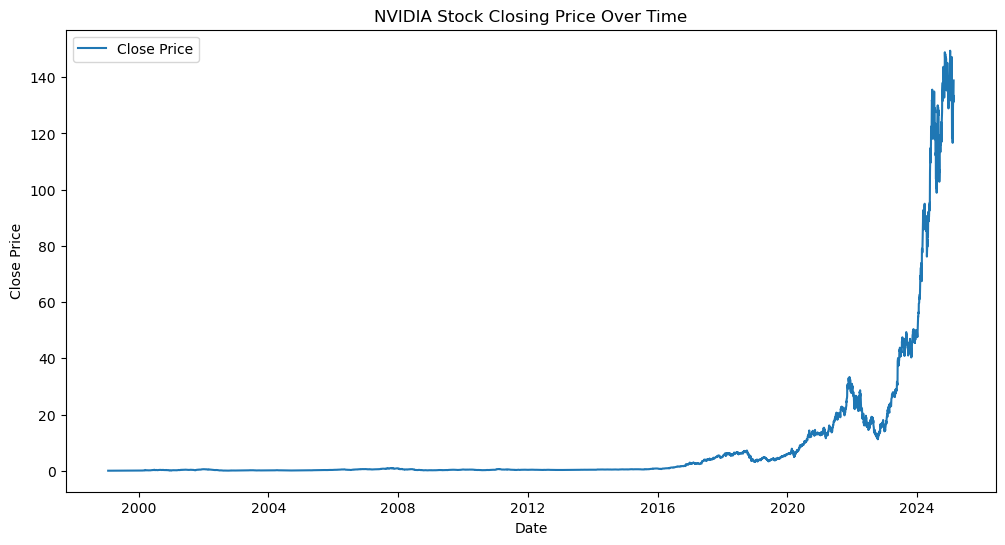

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

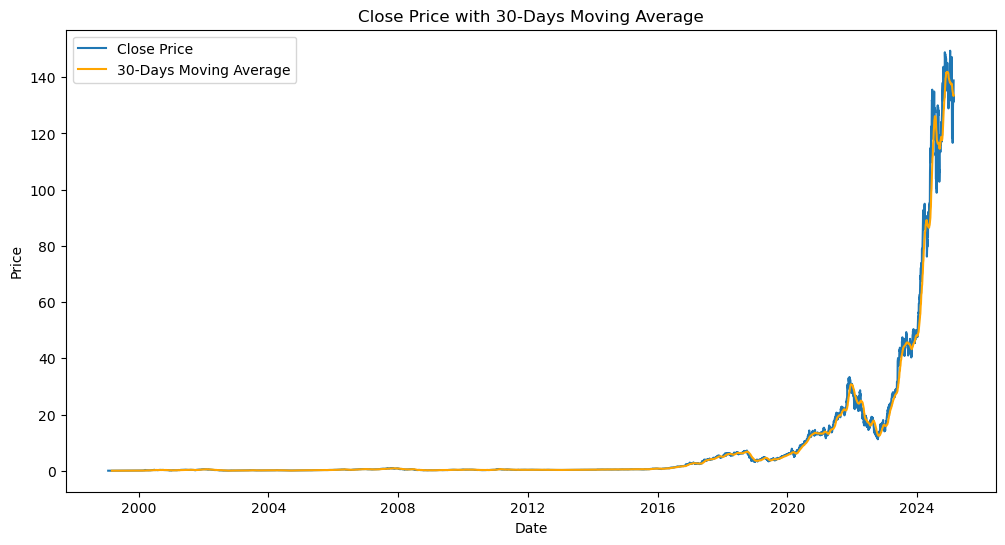

In [20]:
df['Close_30Days_Mean'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Close_30Days_Mean'], label='30-Days Moving Average', color='orange')
plt.title('Close Price with 30-Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

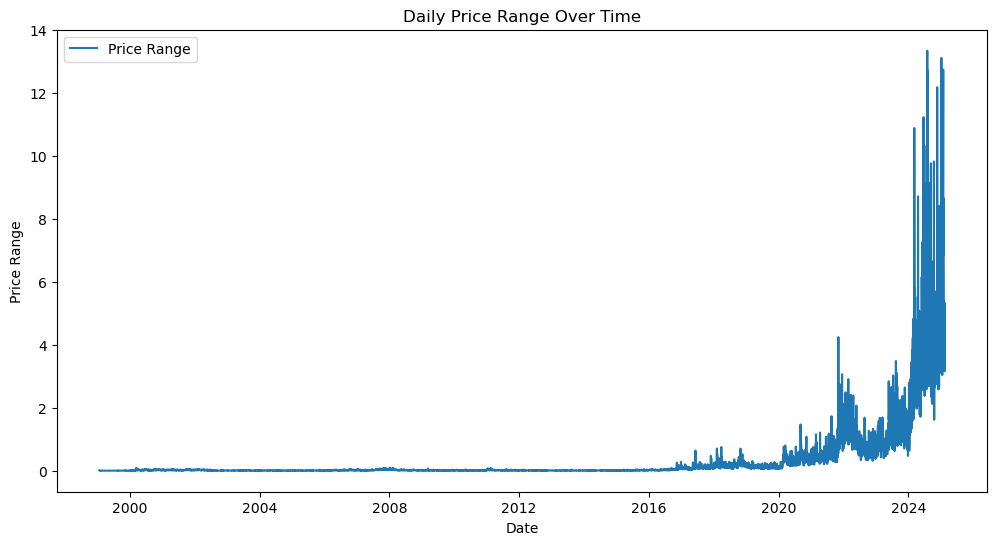

In [21]:
df['Price Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price Range'], label='Price Range')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()